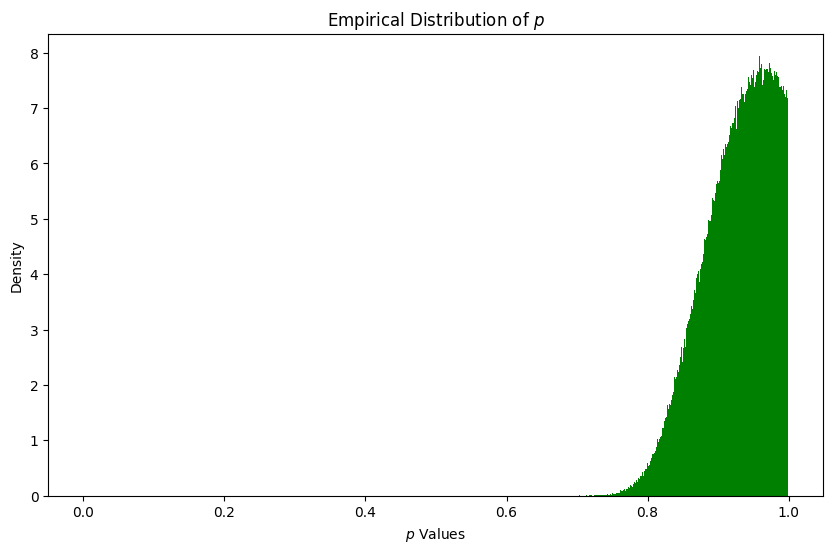

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Function to generate truncated normal values
def truncated_normal(mean=0.5, sd=0.1, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

# Simulate k and q from truncated normal distributions
np.random.seed(42)  # For reproducibility
k = truncated_normal(0.6, 0.01).rvs(1000000)
q = truncated_normal(0.4, 0.02).rvs(1000000)

# Calculate p using the derived formula, ensuring we don't divide by zero or get undefined values
valid_indices = (2*q - 1) != 0  # Avoid division by zero
p = (k[valid_indices] - 1 + q[valid_indices]) / (2*q[valid_indices] - 1)

# Removing p values that are not within the (0, 1) interval
p = p[(p > 0) & (p < 1)]

# Plot the distribution of p
plt.figure(figsize=(10, 6))
plt.hist(p, bins=np.arange(0, 1, 0.001), density=True, stacked=True, color='g')
plt.title('Empirical Distribution of $p$')
plt.xlabel('$p$ Values')
plt.ylabel('Density')
plt.show()